In [1]:
from PIL import Image
import imageio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from scipy import ndimage as ndi
from skimage import feature
from skimage.color import rgb2gray
%matplotlib inline
from skimage import io

In [39]:
im =cv2.imread('cropped_test.jpg')
hsv=cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
figure_size = 9
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)



print('Original image')
print('Shape of the image : {}'.format(im.shape))
print('Image Hight {}'.format(im.shape[0]))
print('Image Width {}'.format(im.shape[1]))
print('Dimension of Image {}'.format(im.ndim))
print()
print()

print('Grayscale image')
print('Shape of the image : {}'.format(gray.shape))
print('Image Hight {}'.format(gray.shape[0]))
print('Image Width {}'.format(gray.shape[1]))
print('Dimension of Image {}'.format(gray.ndim))

Original image
Shape of the image : (981, 1487, 3)
Image Hight 981
Image Width 1487
Dimension of Image 3


Grayscale image
Shape of the image : (981, 1487)
Image Hight 981
Image Width 1487
Dimension of Image 2


## Fast Fourier Transform on the Image

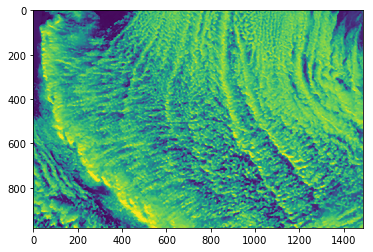

In [18]:
median_image = cv2.medianBlur(gray, figure_size)
plt.imshow(median_image)

## Open with CV2 + Sobel Edge

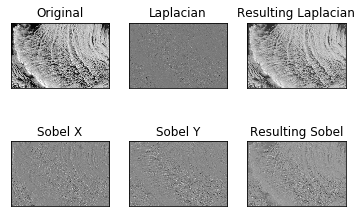

In [22]:
# convolute with proper kernels
laplacian = cv2.Laplacian(median_image,cv2.CV_64F)
sobelx = cv2.Sobel(median_image,cv2.CV_64F,1,0,ksize=3)  # x
sobely = cv2.Sobel(median_image,cv2.CV_64F,0,1,ksize=3)  # y


plt.subplot(2,3,1),plt.imshow(median_image,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(median_image+laplacian,cmap = 'gray')
plt.title('Resulting Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,4),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6),plt.imshow(median_image+sobelx+sobely,cmap = 'gray')
plt.title('Resulting Sobel'), plt.xticks([]), plt.yticks([])

plt.show()

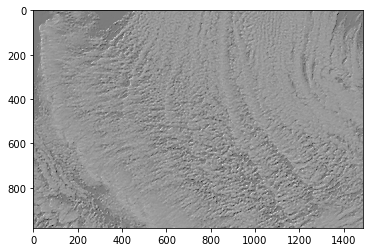

In [26]:
plt.imshow(median_image+sobelx+sobely,cmap = 'gray')
resulting_sobel=median_image+sobelx+sobely

## Scipy cluster detection on the Sobel image

Number of clusters is 2741


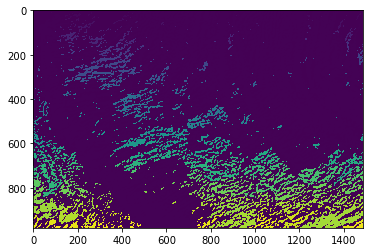

In [32]:
mask = resulting_sobel > resulting_sobel.mean() +10   # mask those pixels whose intensity is above mean
label_im, nb_labels = ndi.label(mask)   # connected components form clusters
print(f"Number of clusters is {nb_labels}")
plt.imshow(label_im);

In [36]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#define the vertical filter
vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]

#define the horizontal filter
horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]

#read in the pinwheel image
img = plt.imread('cropped_test.jpg')

#get the dimensions of the image
n,m,d = img.shape

#initialize the edges image
edges_img = img.copy()

#loop over all pixels in the image
for row in range(3, n-2):
    for col in range(3, m-2):
        
        #create little local 3x3 box
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        
        #apply the vertical filter
        vertical_transformed_pixels = vertical_filter*local_pixels
        #remap the vertical score
        vertical_score = vertical_transformed_pixels.sum()/4
        
        #apply the horizontal filter
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        #remap the horizontal score
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        #combine the horizontal and vertical scores into a total edge score
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        
#         print(img.shape)
#         print([edge_score]*3)
#         print(edges_img[row, col])
        #insert this edge score into the edges image
        edges_img[row, col] = [edge_score]*3

#remap the values in the 0-1 range in case they went out of bounds
edges_img = edges_img/edges_img.max()

(981, 1487, 3)
[0.7905694150420949, 0.7905694150420949, 0.7905694150420949]
[24 36 48]
(981, 1487, 3)
[1.0, 1.0, 1.0]
[24 36 48]
(981, 1487, 3)
[1.5, 1.5, 1.5]
[25 37 49]
(981, 1487, 3)
[1.0, 1.0, 1.0]
[26 38 50]
(981, 1487, 3)
[0.3535533905932738, 0.3535533905932738, 0.3535533905932738]
[26 38 50]
(981, 1487, 3)
[0.5, 0.5, 0.5]
[25 37 49]
(981, 1487, 3)
[1.7677669529663689, 1.7677669529663689, 1.7677669529663689]
[26 38 50]
(981, 1487, 3)
[1.5, 1.5, 1.5]
[27 39 51]
(981, 1487, 3)
[0.7905694150420949, 0.7905694150420949, 0.7905694150420949]
[28 40 52]
(981, 1487, 3)
[0.7071067811865476, 0.7071067811865476, 0.7071067811865476]
[28 40 52]
(981, 1487, 3)
[1.0, 1.0, 1.0]
[27 39 51]
(981, 1487, 3)
[1.118033988749895, 1.118033988749895, 1.118033988749895]
[27 39 51]
(981, 1487, 3)
[1.7677669529663689, 1.7677669529663689, 1.7677669529663689]
[26 38 50]
(981, 1487, 3)
[1.118033988749895, 1.118033988749895, 1.118033988749895]
[25 37 49]
(981, 1487, 3)
[2.5, 2.5, 2.5]
[27 39 51]
(981, 1487, 3)
[

[35.20298282816387, 35.20298282816387, 35.20298282816387]
[193 192 190]
(981, 1487, 3)
[82.63549479491243, 82.63549479491243, 82.63549479491243]
[198 198 196]
(981, 1487, 3)
[151.12122617289737, 151.12122617289737, 151.12122617289737]
[198 198 196]
(981, 1487, 3)
[78.88123984826811, 78.88123984826811, 78.88123984826811]
[4 4 2]
(981, 1487, 3)
[19.264604849308483, 19.264604849308483, 19.264604849308483]
[1 1 0]
(981, 1487, 3)
[45.8530260724415, 45.8530260724415, 45.8530260724415]
[12 13 17]
(981, 1487, 3)
[48.3489917164774, 48.3489917164774, 48.3489917164774]
[0 0 4]
(981, 1487, 3)
[94.79781115616541, 94.79781115616541, 94.79781115616541]
[2 3 5]
(981, 1487, 3)
[148.5349285521759, 148.5349285521759, 148.5349285521759]
[176 177 179]
(981, 1487, 3)
[124.14759361340839, 124.14759361340839, 124.14759361340839]
[168 169 171]
(981, 1487, 3)
[66.15228643062913, 66.15228643062913, 66.15228643062913]
[173 173 175]
(981, 1487, 3)
[117.2204120450018, 117.2204120450018, 117.2204120450018]
[204 204 

[42.90104893822527, 42.90104893822527, 42.90104893822527]
[214 216 215]
(981, 1487, 3)
[24.9098374141623, 24.9098374141623, 24.9098374141623]
[245 246 248]
(981, 1487, 3)
[24.520399670478458, 24.520399670478458, 24.520399670478458]
[242 243 245]
(981, 1487, 3)
[28.96981187374195, 28.96981187374195, 28.96981187374195]
[211 212 214]
(981, 1487, 3)
[14.326548781894402, 14.326548781894402, 14.326548781894402]
[202 203 207]
(981, 1487, 3)
[34.32382554436495, 34.32382554436495, 34.32382554436495]
[219 220 224]
(981, 1487, 3)
[36.6742416417845, 36.6742416417845, 36.6742416417845]
[234 233 238]
(981, 1487, 3)
[40.38873605350878, 40.38873605350878, 40.38873605350878]
[235 234 239]
(981, 1487, 3)
[42.15744299646268, 42.15744299646268, 42.15744299646268]
[219 219 221]
(981, 1487, 3)
[28.559149146989657, 28.559149146989657, 28.559149146989657]
[191 191 193]
(981, 1487, 3)
[12.96630247988994, 12.96630247988994, 12.96630247988994]
[189 189 191]
(981, 1487, 3)
[36.34040451068205, 36.34040451068205, 3

[176 187 191]
(981, 1487, 3)
[36.27154532136727, 36.27154532136727, 36.27154532136727]
[201 212 216]
(981, 1487, 3)
[38.021375566909725, 38.021375566909725, 38.021375566909725]
[206 215 220]
(981, 1487, 3)
[32.25871975140985, 32.25871975140985, 32.25871975140985]
[206 205 200]
(981, 1487, 3)
[10.688779163215974, 10.688779163215974, 10.688779163215974]
[200 197 192]
(981, 1487, 3)
[23.717082451262844, 23.717082451262844, 23.717082451262844]
[205 200 194]
(981, 1487, 3)
[31.084562084739105, 31.084562084739105, 31.084562084739105]
[226 217 210]
(981, 1487, 3)
[22.135943621178654, 22.135943621178654, 22.135943621178654]
[245 234 228]
(981, 1487, 3)
[46.861498055439924, 46.861498055439924, 46.861498055439924]
[246 235 231]
(981, 1487, 3)
[71.94181676883063, 71.94181676883063, 71.94181676883063]
[221 211 210]
(981, 1487, 3)
[82.60296604844163, 82.60296604844163, 82.60296604844163]
[191 182 185]
(981, 1487, 3)
[86.2532608079254, 86.2532608079254, 86.2532608079254]
[144 142 147]
(981, 1487, 3)

(981, 1487, 3)
[21.27204738618265, 21.27204738618265, 21.27204738618265]
[73 78 81]
(981, 1487, 3)
[66.00946901770988, 66.00946901770988, 66.00946901770988]
[102 106 107]
(981, 1487, 3)
[53.85164807134504, 53.85164807134504, 53.85164807134504]
[149 153 152]
(981, 1487, 3)
[36.87309317103733, 36.87309317103733, 36.87309317103733]
[166 168 167]
(981, 1487, 3)
[42.85148772213166, 42.85148772213166, 42.85148772213166]
[170 169 167]
(981, 1487, 3)
[76.68930825088984, 76.68930825088984, 76.68930825088984]
[147 147 149]
(981, 1487, 3)
[115.15912903456677, 115.15912903456677, 115.15912903456677]
[ 93  96 101]
(981, 1487, 3)
[85.21296849658508, 85.21296849658508, 85.21296849658508]
[34 43 52]
(981, 1487, 3)
[15.008331019803634, 15.008331019803634, 15.008331019803634]
[19 31 45]
(981, 1487, 3)
[8.5, 8.5, 8.5]
[26 42 58]
(981, 1487, 3)
[5.533985905294664, 5.533985905294664, 5.533985905294664]
[25 42 62]
(981, 1487, 3)
[1.8027756377319946, 1.8027756377319946, 1.8027756377319946]
[30 46 69]
(981, 1

(981, 1487, 3)
[5.062114182829147, 5.062114182829147, 5.062114182829147]
[22 35 44]
(981, 1487, 3)
[2.9154759474226504, 2.9154759474226504, 2.9154759474226504]
[24 38 49]
(981, 1487, 3)
[5.70087712549569, 5.70087712549569, 5.70087712549569]
[22 38 51]
(981, 1487, 3)
[4.743416490252569, 4.743416490252569, 4.743416490252569]
[15 33 47]
(981, 1487, 3)
[6.45174395028197, 6.45174395028197, 6.45174395028197]
[18 36 48]
(981, 1487, 3)
[4.0, 4.0, 4.0]
[23 41 53]
(981, 1487, 3)
[42.08622102303793, 42.08622102303793, 42.08622102303793]
[11 28 38]
(981, 1487, 3)
[120.81494112898454, 120.81494112898454, 120.81494112898454]
[39 56 64]
(981, 1487, 3)
[156.65766818129268, 156.65766818129268, 156.65766818129268]
[ 88 105 112]
(981, 1487, 3)
[131.50095056690654, 131.50095056690654, 131.50095056690654]
[122 125 134]
(981, 1487, 3)
[103.62974958958455, 103.62974958958455, 103.62974958958455]
[ 96  99 108]
(981, 1487, 3)
[79.78800035092996, 79.78800035092996, 79.78800035092996]
[50 54 65]
(981, 1487, 3)
[

(981, 1487, 3)
[34.17601498127012, 34.17601498127012, 34.17601498127012]
[158 158 160]
(981, 1487, 3)
[40.10766759610935, 40.10766759610935, 40.10766759610935]
[181 181 181]
(981, 1487, 3)
[33.354160160315836, 33.354160160315836, 33.354160160315836]
[196 196 196]
(981, 1487, 3)
[26.384180866572304, 26.384180866572304, 26.384180866572304]
[212 212 214]
(981, 1487, 3)
[44.34241761564202, 44.34241761564202, 44.34241761564202]
[207 206 211]
(981, 1487, 3)
[50.6964002666856, 50.6964002666856, 50.6964002666856]
[189 186 193]
(981, 1487, 3)
[47.98176737053357, 47.98176737053357, 47.98176737053357]
[179 176 183]
(981, 1487, 3)
[79.25039432078556, 79.25039432078556, 79.25039432078556]
[148 145 152]
(981, 1487, 3)
[44.93467480687937, 44.93467480687937, 44.93467480687937]
[95 93 98]
(981, 1487, 3)
[102.84089653440405, 102.84089653440405, 102.84089653440405]
[123 121 126]
(981, 1487, 3)
[111.12380483046826, 111.12380483046826, 111.12380483046826]
[185 185 187]
(981, 1487, 3)
[96.52072316347407, 96

[38.73628789649313, 38.73628789649313, 38.73628789649313]
[179 173 177]
(981, 1487, 3)
[31.100643080167973, 31.100643080167973, 31.100643080167973]
[166 160 164]
(981, 1487, 3)
[28.811889906772862, 28.811889906772862, 28.811889906772862]
[162 157 163]
(981, 1487, 3)
[89.28605714219886, 89.28605714219886, 89.28605714219886]
[153 148 154]
(981, 1487, 3)
[116.9556539890227, 116.9556539890227, 116.9556539890227]
[198 187 201]
(981, 1487, 3)
[106.7643432986875, 106.7643432986875, 106.7643432986875]
[197 187 198]
(981, 1487, 3)
[93.69164850721755, 93.69164850721755, 93.69164850721755]
[183 171 181]
(981, 1487, 3)
[61.92031169172196, 61.92031169172196, 61.92031169172196]
[212 201 209]
(981, 1487, 3)
[39.98280880578552, 39.98280880578552, 39.98280880578552]
[200 189 197]
(981, 1487, 3)
[46.659672094861534, 46.659672094861534, 46.659672094861534]
[171 161 169]
(981, 1487, 3)
[64.46413731680585, 64.46413731680585, 64.46413731680585]
[162 157 163]
(981, 1487, 3)
[89.06879363727792, 89.06879363727

(981, 1487, 3)
[36.37478522273362, 36.37478522273362, 36.37478522273362]
[184 196 192]
(981, 1487, 3)
[39.953097501945955, 39.953097501945955, 39.953097501945955]
[167 168 172]
(981, 1487, 3)
[29.062432795621223, 29.062432795621223, 29.062432795621223]
[150 151 155]
(981, 1487, 3)
[28.844410203711913, 28.844410203711913, 28.844410203711913]
[163 162 167]
(981, 1487, 3)
[23.71181140275875, 23.71181140275875, 23.71181140275875]
[170 170 172]
(981, 1487, 3)
[37.84507894033252, 37.84507894033252, 37.84507894033252]
[186 186 188]
(981, 1487, 3)
[41.72079817069659, 41.72079817069659, 41.72079817069659]
[204 204 206]
(981, 1487, 3)
[38.47076812334269, 38.47076812334269, 38.47076812334269]
[230 230 230]
(981, 1487, 3)
[13.0862523283024, 13.0862523283024, 13.0862523283024]
[247 247 247]
(981, 1487, 3)
[7.0710678118654755, 7.0710678118654755, 7.0710678118654755]
[242 242 242]
(981, 1487, 3)
[11.297123527695003, 11.297123527695003, 11.297123527695003]
[236 236 236]
(981, 1487, 3)
[20.015618901248

(981, 1487, 3)
[29.740544715926102, 29.740544715926102, 29.740544715926102]
[204 193 189]
(981, 1487, 3)
[33.07000151194433, 33.07000151194433, 33.07000151194433]
[196 186 184]
(981, 1487, 3)
[88.89600665946699, 88.89600665946699, 88.89600665946699]
[171 162 163]
(981, 1487, 3)
[114.86622654200842, 114.86622654200842, 114.86622654200842]
[107 102 106]
(981, 1487, 3)
[88.25247871873061, 88.25247871873061, 88.25247871873061]
[85 80 86]
(981, 1487, 3)
[86.33148324916003, 86.33148324916003, 86.33148324916003]
[93 88 82]
(981, 1487, 3)
[90.10271915985666, 90.10271915985666, 90.10271915985666]
[147 142 138]
(981, 1487, 3)
[33.354160160315836, 33.354160160315836, 33.354160160315836]
[180 175 171]
(981, 1487, 3)
[27.51590449176621, 27.51590449176621, 27.51590449176621]
[193 188 185]
(981, 1487, 3)
[45.617978911828175, 45.617978911828175, 45.617978911828175]
[193 188 185]
(981, 1487, 3)
[55.05111261364297, 55.05111261364297, 55.05111261364297]
[176 172 171]
(981, 1487, 3)
[51.65873595046631, 51

[42.37924020083418, 42.37924020083418, 42.37924020083418]
[200 202 201]
(981, 1487, 3)
[65.25431020246862, 65.25431020246862, 65.25431020246862]
[177 178 182]
(981, 1487, 3)
[95.26607475906626, 95.26607475906626, 95.26607475906626]
[139 142 149]
(981, 1487, 3)
[118.83233987429516, 118.83233987429516, 118.83233987429516]
[ 91  94 103]
(981, 1487, 3)
[78.89233169326408, 78.89233169326408, 78.89233169326408]
[27 31 42]
(981, 1487, 3)
[57.063561052566634, 57.063561052566634, 57.063561052566634]
[ 8 15 25]
(981, 1487, 3)
[95.06905385034607, 95.06905385034607, 95.06905385034607]
[75 82 92]
(981, 1487, 3)
[22.784314780128895, 22.784314780128895, 22.784314780128895]
[ 94 103 112]
(981, 1487, 3)
[52.75533148412585, 52.75533148412585, 52.75533148412585]
[100 109 118]
(981, 1487, 3)
[76.15773105863909, 76.15773105863909, 76.15773105863909]
[153 156 163]
(981, 1487, 3)
[79.33630946798571, 79.33630946798571, 79.33630946798571]
[165 170 176]
(981, 1487, 3)
[86.01889327351289, 86.01889327351289, 86.0

(981, 1487, 3)
[7.591113225344488, 7.591113225344488, 7.591113225344488]
[182 186 189]
(981, 1487, 3)
[15.463667094192115, 15.463667094192115, 15.463667094192115]
[190 193 198]
(981, 1487, 3)
[12.419742348374221, 12.419742348374221, 12.419742348374221]
[195 200 204]
(981, 1487, 3)
[13.0, 13.0, 13.0]
[202 207 211]
(981, 1487, 3)
[10.965856099730654, 10.965856099730654, 10.965856099730654]
[208 206 209]
(981, 1487, 3)
[9.055385138137417, 9.055385138137417, 9.055385138137417]
[209 209 211]
(981, 1487, 3)
[12.5, 12.5, 12.5]
[215 215 215]
(981, 1487, 3)
[15.572411502397436, 15.572411502397436, 15.572411502397436]
[217 217 217]
(981, 1487, 3)
[24.38237068047322, 24.38237068047322, 24.38237068047322]
[213 213 213]
(981, 1487, 3)
[37.16517186829626, 37.16517186829626, 37.16517186829626]
[213 213 211]
(981, 1487, 3)
[57.446714440427314, 57.446714440427314, 57.446714440427314]
[212 212 210]
(981, 1487, 3)
[74.47231029046971, 74.47231029046971, 74.47231029046971]
[208 208 206]
(981, 1487, 3)
[80.

[252 254 251]
(981, 1487, 3)
[14.866068747318506, 14.866068747318506, 14.866068747318506]
[254 255 251]
(981, 1487, 3)
[42.5455638110485, 42.5455638110485, 42.5455638110485]
[237 239 234]
(981, 1487, 3)
[53.48130514488217, 53.48130514488217, 53.48130514488217]
[215 217 212]
(981, 1487, 3)
[35.75262228144951, 35.75262228144951, 35.75262228144951]
[190 191 186]
(981, 1487, 3)
[20.130822139197395, 20.130822139197395, 20.130822139197395]
[191 192 187]
(981, 1487, 3)
[26.13666007737025, 26.13666007737025, 26.13666007737025]
[188 189 184]
(981, 1487, 3)
[36.99493208535461, 36.99493208535461, 36.99493208535461]
[180 181 175]
(981, 1487, 3)
[56.08029957123981, 56.08029957123981, 56.08029957123981]
[194 193 188]
(981, 1487, 3)
[60.955926701183046, 60.955926701183046, 60.955926701183046]
[219 218 213]
(981, 1487, 3)
[48.54894437575342, 48.54894437575342, 48.54894437575342]
[241 240 235]
(981, 1487, 3)
[39.528470752104745, 39.528470752104745, 39.528470752104745]
[249 248 243]
(981, 1487, 3)
[38.4

[182 182 184]
(981, 1487, 3)
[97.08308297535673, 97.08308297535673, 97.08308297535673]
[203 198 195]
(981, 1487, 3)
[95.39457531746761, 95.39457531746761, 95.39457531746761]
[204 199 196]
(981, 1487, 3)
[79.40403012442127, 79.40403012442127, 79.40403012442127]
[200 195 192]
(981, 1487, 3)
[55.274315916164895, 55.274315916164895, 55.274315916164895]
[193 189 188]
(981, 1487, 3)
[32.26646866330432, 32.26646866330432, 32.26646866330432]
[199 195 194]
(981, 1487, 3)
[23.58495283014151, 23.58495283014151, 23.58495283014151]
[205 201 200]
(981, 1487, 3)
[45.22305827782991, 45.22305827782991, 45.22305827782991]
[185 183 184]
(981, 1487, 3)
[47.47236037948819, 47.47236037948819, 47.47236037948819]
[153 151 152]
(981, 1487, 3)
[18.333712117299104, 18.333712117299104, 18.333712117299104]
[131 129 130]
(981, 1487, 3)
[15.264337522473747, 15.264337522473747, 15.264337522473747]
[136 136 138]
(981, 1487, 3)
[11.180339887498949, 11.180339887498949, 11.180339887498949]
[144 144 146]
(981, 1487, 3)
[2

[165 166 168]
(981, 1487, 3)
[29.90819285747636, 29.90819285747636, 29.90819285747636]
[187 187 189]
(981, 1487, 3)
[29.652150006365474, 29.652150006365474, 29.652150006365474]
[193 193 195]
(981, 1487, 3)
[25.83118270617898, 25.83118270617898, 25.83118270617898]
[194 194 196]
(981, 1487, 3)
[20.751505969447134, 20.751505969447134, 20.751505969447134]
[188 188 190]
(981, 1487, 3)
[39.05124837953327, 39.05124837953327, 39.05124837953327]
[208 208 210]
(981, 1487, 3)
[39.129592382236744, 39.129592382236744, 39.129592382236744]
[222 222 224]
(981, 1487, 3)
[71.46765002432919, 71.46765002432919, 71.46765002432919]
[210 210 212]
(981, 1487, 3)
[83.32841652161645, 83.32841652161645, 83.32841652161645]
[192 192 192]
(981, 1487, 3)
[79.13437938089866, 79.13437938089866, 79.13437938089866]
[180 180 180]
(981, 1487, 3)
[76.55880093104906, 76.55880093104906, 76.55880093104906]
[181 181 181]
(981, 1487, 3)
[68.80770305714324, 68.80770305714324, 68.80770305714324]
[175 176 180]
(981, 1487, 3)
[52.5

(981, 1487, 3)
[34.81738071710737, 34.81738071710737, 34.81738071710737]
[150 148 153]
(981, 1487, 3)
[29.75945227990596, 29.75945227990596, 29.75945227990596]
[149 147 152]
(981, 1487, 3)
[19.300259065618782, 19.300259065618782, 19.300259065618782]
[135 133 138]
(981, 1487, 3)
[48.68906448064082, 48.68906448064082, 48.68906448064082]
[144 149 145]
(981, 1487, 3)
[82.38931969618392, 82.38931969618392, 82.38931969618392]
[187 192 188]
(981, 1487, 3)
[18.867962264113206, 18.867962264113206, 18.867962264113206]
[224 229 225]
(981, 1487, 3)
[51.20790954530364, 51.20790954530364, 51.20790954530364]
[201 206 202]
(981, 1487, 3)
[34.9463875100131, 34.9463875100131, 34.9463875100131]
[179 181 178]
(981, 1487, 3)
[52.55116554368704, 52.55116554368704, 52.55116554368704]
[190 192 189]
(981, 1487, 3)
[61.24234646059865, 61.24234646059865, 61.24234646059865]
[230 232 229]
(981, 1487, 3)
[33.94849039353591, 33.94849039353591, 33.94849039353591]
[254 255 251]
(981, 1487, 3)
[5.70087712549569, 5.7008

(981, 1487, 3)
[59.927038972403764, 59.927038972403764, 59.927038972403764]
[233 233 225]
(981, 1487, 3)
[80.25739841285662, 80.25739841285662, 80.25739841285662]
[202 200 201]
(981, 1487, 3)
[62.03224967708329, 62.03224967708329, 62.03224967708329]
[177 175 176]
(981, 1487, 3)
[40.17617453167984, 40.17617453167984, 40.17617453167984]
[186 184 185]
(981, 1487, 3)
[20.886598574205422, 20.886598574205422, 20.886598574205422]
[199 197 198]
(981, 1487, 3)
[7.1501748230375455, 7.1501748230375455, 7.1501748230375455]
[202 200 201]
(981, 1487, 3)
[13.009611831257688, 13.009611831257688, 13.009611831257688]
[202 200 201]
(981, 1487, 3)
[25.004999500099974, 25.004999500099974, 25.004999500099974]
[191 189 190]
(981, 1487, 3)
[23.769728648009426, 23.769728648009426, 23.769728648009426]
[190 188 191]
(981, 1487, 3)
[18.155577655365306, 18.155577655365306, 18.155577655365306]
[203 201 204]
(981, 1487, 3)
[23.550477702161373, 23.550477702161373, 23.550477702161373]
[209 207 210]
(981, 1487, 3)
[27.

(981, 1487, 3)
[1.7677669529663689, 1.7677669529663689, 1.7677669529663689]
[17 29 43]
(981, 1487, 3)
[2.0615528128088303, 2.0615528128088303, 2.0615528128088303]
[17 29 43]
(981, 1487, 3)
[1.5811388300841898, 1.5811388300841898, 1.5811388300841898]
[17 29 43]
(981, 1487, 3)
[1.5, 1.5, 1.5]
[17 29 43]
(981, 1487, 3)
[1.118033988749895, 1.118033988749895, 1.118033988749895]
[18 30 44]
(981, 1487, 3)
[0.7905694150420949, 0.7905694150420949, 0.7905694150420949]
[18 32 45]
(981, 1487, 3)
[0.7905694150420949, 0.7905694150420949, 0.7905694150420949]
[18 32 45]
(981, 1487, 3)
[1.118033988749895, 1.118033988749895, 1.118033988749895]
[18 32 45]
(981, 1487, 3)
[1.0606601717798212, 1.0606601717798212, 1.0606601717798212]
[17 31 44]
(981, 1487, 3)
[0.3535533905932738, 0.3535533905932738, 0.3535533905932738]
[17 31 44]
(981, 1487, 3)
[0.0, 0.0, 0.0]
[17 31 44]
(981, 1487, 3)
[0.3535533905932738, 0.3535533905932738, 0.3535533905932738]
[17 31 44]
(981, 1487, 3)
[0.7071067811865476, 0.70710678118654

[234 240 240]
(981, 1487, 3)
[62.98015560476173, 62.98015560476173, 62.98015560476173]
[215 221 221]
(981, 1487, 3)
[82.92315719990405, 82.92315719990405, 82.92315719990405]
[195 204 203]
(981, 1487, 3)
[94.13952411182032, 94.13952411182032, 94.13952411182032]
[180 190 189]
(981, 1487, 3)
[77.01460900374681, 77.01460900374681, 77.01460900374681]
[156 168 166]
(981, 1487, 3)
[34.44198019858905, 34.44198019858905, 34.44198019858905]
[131 143 141]
(981, 1487, 3)
[4.47213595499958, 4.47213595499958, 4.47213595499958]
[122 137 134]
(981, 1487, 3)
[43.56747640155441, 43.56747640155441, 43.56747640155441]
[134 146 144]
(981, 1487, 3)
[89.35463054593198, 89.35463054593198, 89.35463054593198]
[149 161 159]
(981, 1487, 3)
[100.35001245640181, 100.35001245640181, 100.35001245640181]
[170 180 179]
(981, 1487, 3)
[77.51451476981585, 77.51451476981585, 77.51451476981585]
[168 174 174]
(981, 1487, 3)
[54.94770240874499, 54.94770240874499, 54.94770240874499]
[158 162 163]
(981, 1487, 3)
[45.7124162564

(981, 1487, 3)
[14.84082207965583, 14.84082207965583, 14.84082207965583]
[222 218 219]
(981, 1487, 3)
[22.14158982548453, 22.14158982548453, 22.14158982548453]
[218 216 217]
(981, 1487, 3)
[36.55475345286848, 36.55475345286848, 36.55475345286848]
[200 198 199]
(981, 1487, 3)
[28.991378028648448, 28.991378028648448, 28.991378028648448]
[190 190 190]
(981, 1487, 3)
[19.03943276465977, 19.03943276465977, 19.03943276465977]
[186 188 187]
(981, 1487, 3)
[35.22782990761707, 35.22782990761707, 35.22782990761707]
[185 189 190]
(981, 1487, 3)
[23.68807716974934, 23.68807716974934, 23.68807716974934]
[165 170 173]
(981, 1487, 3)
[23.251344047172843, 23.251344047172843, 23.251344047172843]
[153 161 163]
(981, 1487, 3)
[14.577379737113251, 14.577379737113251, 14.577379737113251]
[134 144 146]
(981, 1487, 3)
[13.82931668593933, 13.82931668593933, 13.82931668593933]
[141 151 153]
(981, 1487, 3)
[34.077118422777474, 34.077118422777474, 34.077118422777474]
[126 137 141]
(981, 1487, 3)
[10.511898020814

[61.82333701766672, 61.82333701766672, 61.82333701766672]
[157 155 160]
(981, 1487, 3)
[118.05983652368828, 118.05983652368828, 118.05983652368828]
[115 118 127]
(981, 1487, 3)
[98.37809715582021, 98.37809715582021, 98.37809715582021]
[47 53 67]
(981, 1487, 3)
[19.81161275615895, 19.81161275615895, 19.81161275615895]
[19 28 45]
(981, 1487, 3)
[12.272937708633577, 12.272937708633577, 12.272937708633577]
[23 36 55]
(981, 1487, 3)
[7.615773105863909, 7.615773105863909, 7.615773105863909]
[29 41 63]
(981, 1487, 3)
[2.7613402542968153, 2.7613402542968153, 2.7613402542968153]
[31 46 67]
(981, 1487, 3)
[6.020797289396148, 6.020797289396148, 6.020797289396148]
[28 43 64]
(981, 1487, 3)
[3.020761493398643, 3.020761493398643, 3.020761493398643]
[25 40 61]
(981, 1487, 3)
[1.7677669529663689, 1.7677669529663689, 1.7677669529663689]
[26 41 62]
(981, 1487, 3)
[2.1505813167606567, 2.1505813167606567, 2.1505813167606567]
[26 41 62]
(981, 1487, 3)
[2.57390753524675, 2.57390753524675, 2.57390753524675]


[17 31 42]
(981, 1487, 3)
[1.7677669529663689, 1.7677669529663689, 1.7677669529663689]
[18 32 43]
(981, 1487, 3)
[0.7905694150420949, 0.7905694150420949, 0.7905694150420949]
[19 33 44]
(981, 1487, 3)
[0.3535533905932738, 0.3535533905932738, 0.3535533905932738]
[19 33 44]
(981, 1487, 3)
[1.0606601717798212, 1.0606601717798212, 1.0606601717798212]
[19 33 44]
(981, 1487, 3)
[1.118033988749895, 1.118033988749895, 1.118033988749895]
[20 34 45]
(981, 1487, 3)
[1.0, 1.0, 1.0]
[20 34 45]
(981, 1487, 3)
[0.7905694150420949, 0.7905694150420949, 0.7905694150420949]
[20 34 45]
(981, 1487, 3)
[0.3535533905932738, 0.3535533905932738, 0.3535533905932738]
[20 34 45]
(981, 1487, 3)
[0.7905694150420949, 0.7905694150420949, 0.7905694150420949]
[19 33 44]
(981, 1487, 3)
[0.7071067811865476, 0.7071067811865476, 0.7071067811865476]
[19 33 44]
(981, 1487, 3)
[0.3535533905932738, 0.3535533905932738, 0.3535533905932738]
[19 33 46]
(981, 1487, 3)
[0.0, 0.0, 0.0]
[19 33 46]
(981, 1487, 3)
[0.0, 0.0, 0.0]
[19 33 

[135 136 138]
(981, 1487, 3)
[75.08078982003319, 75.08078982003319, 75.08078982003319]
[176 177 179]
(981, 1487, 3)
[38.73306081372863, 38.73306081372863, 38.73306081372863]
[222 220 221]
(981, 1487, 3)
[9.394147114027968, 9.394147114027968, 9.394147114027968]
[228 224 225]
(981, 1487, 3)
[12.5, 12.5, 12.5]
[236 230 230]
(981, 1487, 3)
[15.054069217324598, 15.054069217324598, 15.054069217324598]
[253 244 245]
(981, 1487, 3)
[53.23532661682466, 53.23532661682466, 53.23532661682466]
[227 218 219]
(981, 1487, 3)
[51.909777499041546, 51.909777499041546, 51.909777499041546]
[187 187 197]
(981, 1487, 3)
[12.747548783981962, 12.747548783981962, 12.747548783981962]
[165 165 173]
(981, 1487, 3)
[39.76964923154339, 39.76964923154339, 39.76964923154339]
[169 170 175]
(981, 1487, 3)
[38.46101922726437, 38.46101922726437, 38.46101922726437]
[203 204 208]
(981, 1487, 3)
[26.4220551812307, 26.4220551812307, 26.4220551812307]
[214 215 217]
(981, 1487, 3)
[33.5503353187416, 33.5503353187416, 33.5503353

[216 216 216]
(981, 1487, 3)
[44.27471061452576, 44.27471061452576, 44.27471061452576]
[187 185 186]
(981, 1487, 3)
[26.15578329930113, 26.15578329930113, 26.15578329930113]
[175 173 174]
(981, 1487, 3)
[47.077064479425644, 47.077064479425644, 47.077064479425644]
[168 168 168]
(981, 1487, 3)
[76.75040716504375, 76.75040716504375, 76.75040716504375]
[119 119 119]
(981, 1487, 3)
[70.70007072132248, 70.70007072132248, 70.70007072132248]
[100 100 100]
(981, 1487, 3)
[54.9010473488439, 54.9010473488439, 54.9010473488439]
[132 132 132]
(981, 1487, 3)
[45.30176596999283, 45.30176596999283, 45.30176596999283]
[160 160 160]
(981, 1487, 3)
[51.20790954530364, 51.20790954530364, 51.20790954530364]
[177 177 177]
(981, 1487, 3)
[42.485291572496, 42.485291572496, 42.485291572496]
[185 185 187]
(981, 1487, 3)
[27.202941017470888, 27.202941017470888, 27.202941017470888]
[194 189 193]
(981, 1487, 3)
[18.027756377319946, 18.027756377319946, 18.027756377319946]
[190 185 189]
(981, 1487, 3)
[25.4803846124

[51.46965125197566, 51.46965125197566, 51.46965125197566]
[196 192 189]
(981, 1487, 3)
[30.265491900843113, 30.265491900843113, 30.265491900843113]
[186 182 181]
(981, 1487, 3)
[21.180769579975134, 21.180769579975134, 21.180769579975134]
[206 200 202]
(981, 1487, 3)
[33.10022658532718, 33.10022658532718, 33.10022658532718]
[204 198 202]
(981, 1487, 3)
[35.35710678208838, 35.35710678208838, 35.35710678208838]
[197 189 186]
(981, 1487, 3)
[21.569654610122992, 21.569654610122992, 21.569654610122992]
[220 212 209]
(981, 1487, 3)
[10.253048327204938, 10.253048327204938, 10.253048327204938]
[216 206 204]
(981, 1487, 3)
[10.752906583803284, 10.752906583803284, 10.752906583803284]
[207 198 193]
(981, 1487, 3)
[19.319679086361656, 19.319679086361656, 19.319679086361656]
[213 204 199]
(981, 1487, 3)
[34.81738071710737, 34.81738071710737, 34.81738071710737]
[219 210 205]
(981, 1487, 3)
[36.832390636503625, 36.832390636503625, 36.832390636503625]
[183 172 168]
(981, 1487, 3)
[37.89623991902099, 37

[18 32 45]
(981, 1487, 3)
[1.7677669529663689, 1.7677669529663689, 1.7677669529663689]
[18 32 45]
(981, 1487, 3)
[2.7613402542968153, 2.7613402542968153, 2.7613402542968153]
[17 31 44]
(981, 1487, 3)
[7.945124291035352, 7.945124291035352, 7.945124291035352]
[19 33 46]
(981, 1487, 3)
[12.869537676233751, 12.869537676233751, 12.869537676233751]
[26 40 53]
(981, 1487, 3)
[7.0178344238090995, 7.0178344238090995, 7.0178344238090995]
[33 47 60]
(981, 1487, 3)
[6.082762530298219, 6.082762530298219, 6.082762530298219]
[33 47 60]
(981, 1487, 3)
[12.811127975318957, 12.811127975318957, 12.811127975318957]
[26 40 53]
(981, 1487, 3)
[7.632168761236874, 7.632168761236874, 7.632168761236874]
[19 33 46]
(981, 1487, 3)
[5.0, 5.0, 5.0]
[19 33 46]
(981, 1487, 3)
[4.5, 4.5, 4.5]
[19 33 46]
(981, 1487, 3)
[3.2596012026013246, 3.2596012026013246, 3.2596012026013246]
[19 33 46]
(981, 1487, 3)
[2.23606797749979, 2.23606797749979, 2.23606797749979]
[19 33 46]
(981, 1487, 3)
[1.0, 1.0, 1.0]
[20 34 47]
(981, 14

KeyboardInterrupt: 